## Болдырева Анна

Анализ причин выжимаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

## Шаблон исследования

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Гипотеза 1

__Формулировка__: Обслуживающий персонал не спасался. Поискать зависимость от должности или статуса выживаемости

In [50]:
def func_survived_count(x):
    return x.value_counts()


df['pristav']=df['Name'].str.split('.',expand=True)[0]
df['pristav']=df['pristav'].str.split(', ',expand=True)[1]
df2=df.groupby('pristav')['Survived'].aggregate([sum, np.mean]) # группировка по одному столбцу

df2

,sum,mean
pristav,,
Capt,0,0.000000
Col,1,0.500000
Don,0,0.000000
Dr,3,0.428571
Jonkheer,0,0.000000
Lady,1,1.000000
Major,1,0.500000
Master,23,0.575000
Miss,127,0.697802


In [1]:
# Код для проверки гипотезы

###

__Вывод__: выживаемость зависит от должности, выжили в основном пассажиры

###  Гипотеза 2

__Формулировка__: есть зависимость выживания пола от класса

In [38]:
df2=df.groupby(['Sex', 'Pclass'])['Survived'].mean()
df2

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

__Вывод__: Из мужчин лучше спаслись 1 класс, женщины - 1 и 2 класс

### Гипотеза 3
 
__Формулировка__: проверить что есть зависимость от пола и возраста при выживаемости

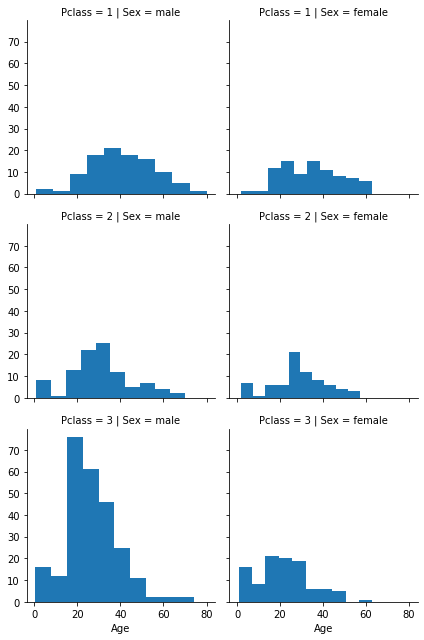

In [58]:
g = sns.FacetGrid(df, col="Sex", row="Pclass")
g = g.map(plt.hist, "Age");

In [67]:
df2=df[df.Age<18].groupby(['Sex', 'Pclass'])['Survived'].aggregate([np.mean, sum])
df2

mean  sum
Sex    Pclass               
female 1       0.875000    7
       2       1.000000   12
       3       0.542857   19
male   1       1.000000    4
       2       0.818182    9
       3       0.232558   10

__Вывод__: детей в классах было примерно одинаково распределено, выжили все мальчики в 1 классе и девочки из 2-го

### Вывод исследования:

больше шанса на выживание имели пассажиры, не персонал, При этом спасались лучше мужчины 1 класса и женщины 1 и 2 класса. Женщины спаслись лучше. Среди детей выживаемость в 1 и 2 классе была примерно одинаковая, практически все дети спаслись